In [ ]:
!gdown 14UW6t4bFLd73DNUk1UHzWnqxAeLfUzMh

Downloading...
From: https://drive.google.com/uc?id=14UW6t4bFLd73DNUk1UHzWnqxAeLfUzMh
To: /content/titanic.csv
100% 61.2k/61.2k [00:00<00:00, 58.8MB/s]


In [ ]:
!pip install altair==5.4.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 658.1/658.1 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.9/188.9 kB 11.9 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [ ]:
import altair
print(altair.__version__) #5.4.1

5.4.1


In [ ]:
import pandas as pd
import altair as alt
import re

In [ ]:
df = pd.read_csv('titanic.csv')

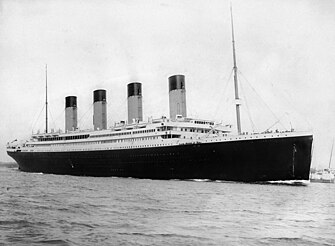

In [ ]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Introdução ao dataset do Titanic

Origem dos dados: https://www.kaggle.com/competitions/titanic/data

## Tamanho da base

In [ ]:
df.shape

(891, 12)

## Dicionário de dados

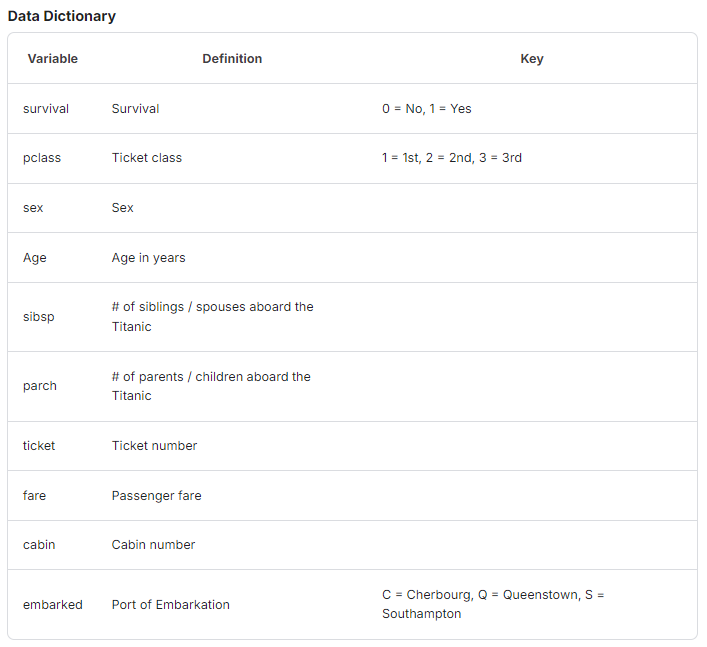

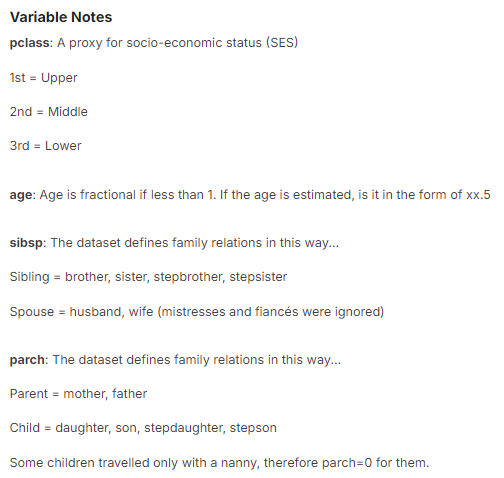

## Data Profiling

Vamos usar a biblioteca Pandas Profiling: https://github.com/ydataai/ydata-profiling

In [ ]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.0/390.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=48eab631e85836e220459976a99ffa3d950c460fc09a157eeef98e3460c36f6a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("pf_titanic.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Questões Potenciais

1.   Havia alguma relação entre a Classe social do passageiro e sua chance de sobrevivência?
2.   Havia alguma relação entre a idade do passageiro e sua chance de sobrevivência?
3.   Mulheres e crianças primeiro? Essa regra foi seguida no Titanic?
4.   A taxa de sobrevivência variou entre diferentes grupos demográficos?

# Pré-processamento

In [ ]:
df = df.drop('PassengerId', axis=1)

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Como tratar os dados faltantes: remoção ou imputação

### Age

Opção 1: A imputação pode ser realizada com a média ou mediana de idade dos passageiros

In [ ]:
df.Age.mean()

29.69911764705882

In [ ]:
df.Age.median()

28.0

In [ ]:
# Imputação com median
# df.Age.fillna(df.Age.median(), inplace=True)

Opção 2: Fazer segmetar idade utilizando outra variável, por exemplo, sexo.

In [ ]:
df[df['Sex'] == 'female'].Age.mean()

27.915708812260537

In [ ]:
df[df['Sex'] == 'male'].Age.mean()

30.72664459161148

In [ ]:
mean_age_by_sex = df.groupby('Sex')['Age'].mean()
mean_age_by_sex

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
# Imputação pela média de idade por sexo
# df['Age'] = df.apply(lambda row: mean_age_by_sex[row['Sex']] if pd.isnull(row['Age']) else row['Age'], axis=1)

Opção 3: Explorar um pouco mais e ver a relação de idade por sexo e classe social

In [ ]:
alt.Chart(df).mark_boxplot(size=30).encode(
    x='Sex:N',
    y='Age:Q',
    color='Sex:N',
    column='Pclass:O'
).properties(width=100)

alt.Chart(...)

In [ ]:
grouped = df.groupby(['Sex', 'Pclass'])
median_ages = grouped['Age'].median()

In [ ]:
median_ages

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
df['Age'] = df.apply(lambda row: median_ages[row['Sex'], row['Pclass']] if pd.isnull(row['Age']) else row['Age'], axis=1)

In [ ]:
df.Age.isnull().sum()

0

### Cabin

In [ ]:
df.Cabin.isna().sum()

687

Opção 1: Excluir coluna

In [ ]:
# df.drop('Cabin', axis=1, inplace=True)

Opção 2: Inserir novo valor 'U' (undefined)

In [ ]:
df.Cabin.fillna('U', inplace=True)

<ipython-input-28-d9d64c580ee2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Cabin.fillna('U', inplace=True)


### Embarked

Opção 1: Apagar as instâncias do dataset

In [ ]:
df.dropna(subset=['Embarked'], inplace=True)

Opção 2: Procurar em outras fontes

## Criação de novas features

### Criar atributo Deck

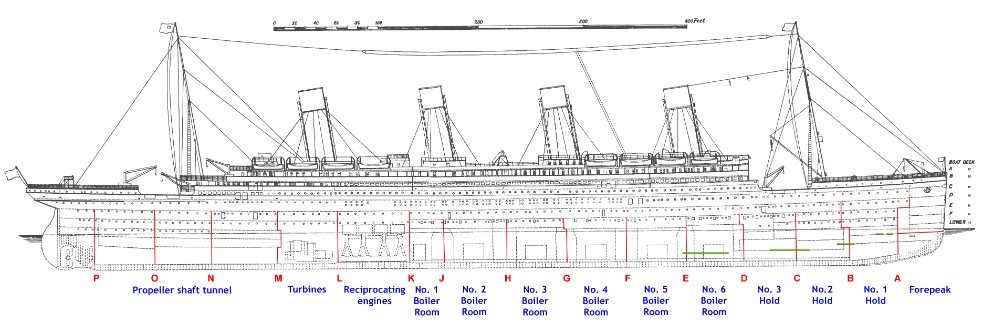

In [ ]:
df.Cabin.value_counts()

Cabin
U              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 147, dtype: int64

In [ ]:
df['Deck'] = df['Cabin'].str[0]

In [ ]:
df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked Deck  
0    male  22.0      1      0         A/5 21171   7.2500     U        S    U  
1  female  38.0      1      0          PC 17599  71.2833   C85        C    C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250     U        S    U  
3  female  35.0      1      0            113803  53.1000  C123        S    C  
4    male  35.0      0      0            373450   8.0500     U        S    U

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

### Criar atributo para pronome de tratamento

In [ ]:
df['Pron'] = df['Name'].apply(lambda x: re.search(r"\w*[.^&*]+\w*", x).group())

In [ ]:
df.drop('Name', axis=1, inplace=True)

In [ ]:
df.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Embarked Deck   Pron  
0        S    U    Mr.  
1        C    C   Mrs.  
2        S    U  Miss.  
3        S    C   Mrs.  
4        S    U    Mr.

In [ ]:
df.to_csv('titanic_pos_.csv', index=False)

# Exploração dos dados

In [ ]:
df.Survived.value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

In [ ]:
df.Sex.value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='Sex:N',
    y='count(Sex)'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [ ]:
df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='Embarked:N',
    y='count(Embarked)'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [ ]:
df.Survived.value_counts() / df.shape[0]

Survived
0    0.617548
1    0.382452
Name: count, dtype: float64

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='Pclass:N',
    y='count(Pclass)'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='SibSp:O',
    y='count(SibSp)'
).properties(
    width=500,
    height=300
)

alt.Chart(...)

In [ ]:
alt.Chart(df).mark_boxplot().encode(
    alt.Y("Age:Q").scale(zero=False)
).properties(
    width=200,
    height=300
)

alt.Chart(...)

In [ ]:
df_num = df[['Age', 'SibSp', 'Parch', 'Fare']]

In [ ]:
df_num.cov()

Age     SibSp     Parch         Fare
Age    176.097194 -3.649293 -1.868612    79.046333
SibSp   -3.649293  1.218164  0.369119     8.824866
Parch   -1.868612  0.369119  0.650863     8.721729
Fare    79.046333  8.824866  8.721729  2469.841935

In [ ]:
df_num.corr()

Age     SibSp     Parch      Fare
Age    1.000000 -0.249161 -0.174541  0.119859
SibSp -0.249161  1.000000  0.414542  0.160887
Parch -0.174541  0.414542  1.000000  0.217532
Fare   0.119859  0.160887  0.217532  1.000000

In [ ]:
alt.Chart(df).mark_circle().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color='Survived:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['Age', 'SibSp', 'Parch', 'Fare'],
    column=['Age', 'SibSp', 'Parch', 'Fare']
).interactive()

alt.RepeatChart(...)

In [ ]:
df_num.corr().style.background_gradient(cmap='Blues')

<Axes: xlabel='Age', ylabel='Fare'>

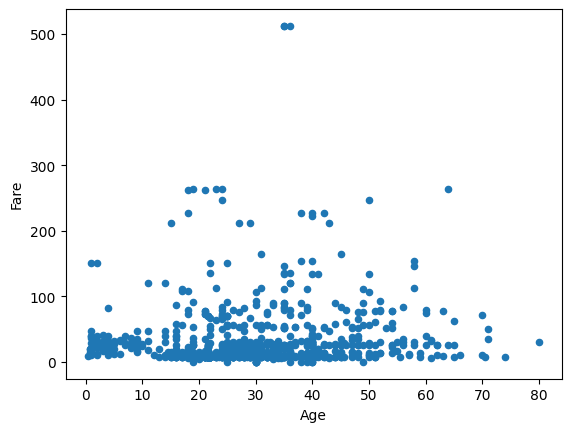

In [ ]:
df.plot.scatter(x='Age', y='Fare')

<Axes: ylabel='Frequency'>

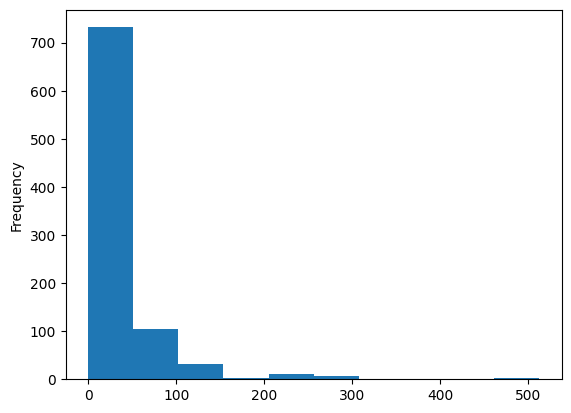

In [ ]:
df.Fare.plot(kind='hist')

# Discussões

## 1.   Havia alguma relação entre a Classe social do passageiro e sua chance de sobrevivência?

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='Survived:O',
    y='count(Survived):Q',
    color='Survived:N',
    column='Pclass:N'
)

alt.Chart(...)

2.   Havia alguma relação entre a idade do passageiro e sua chance de sobrevivência?
3.   Mulheres e crianças primeiro? Essa regra foi seguida no Titanic?
4.   A taxa de sobrevivência variou entre diferentes grupos demográficos?

In [ ]:
alt.Chart(df).mark_bar().encode(
    x='Survived:O',
    y='count(Survived):Q',
    color='Survived:N',
    column='Sex:N'
)

alt.Chart(...)

In [ ]:
base = alt.Chart(df)
base_bar = base.mark_bar(opacity=0.2, binSpacing=0)

xscale = alt.Scale(domain=(0, 80))
yscale = alt.Scale(domain=(0, 1))


gaussian_jitter = base.mark_circle(size=8).encode(
    y="Survived:N",
    x="Age:Q",
    yOffset="jitter:Q",
    color=alt.Color('Sex:N'),#.legend(None)
).transform_calculate(
    # Generate Gaussian jitter with a Box-Muller transform
    jitter="sqrt(-2*log(random()))*cos(2*PI*random())"
).properties(
    width=500,
    height=300
)

top_hist = (
    base_bar
    .encode(
        alt.X("Age:Q")
            # when using bins, the axis scale is set through
            # the bin extent, so we do not specify the scale here
            # (which would be ignored anyway)
            .bin(maxbins=20, extent=xscale.domain).stack(None).title(""),
        alt.Y("count()").stack(None).title(""),
        alt.Color("Sex:N"),
    ).properties(
    width=500,
    height=50
    )
)

top_hist & gaussian_jitter

alt.VConcatChart(...)

In [ ]:
alt.Chart(df).mark_circle().encode(
    alt.X('Age:Q'),
    alt.Y('Survived:N'),
    color='Sex:N',
).properties(
    width=500,
    height=300
)

/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked', 'Deck', 'Pron'],
      dtype='object')